In [1]:
import pandas
import numpy

df = pandas.read_csv('../data/survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [2]:
# extract the data we're interested in
# looking at both whether or not a developer reviews code, and how long
# they spend reviewing code each week
df = df[['CodeRev', 'CodeRevHrs', 'JobSat']]
df.head()

,CodeRev,CodeRevHrs,JobSat
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,No,NaN,Slightly satisfied
3,No,NaN,Slightly satisfied
4,"Yes, because I see value in code review",NaN,Slightly dissatisfied


In [3]:
total_length = len(df)
code_rev_length = df['CodeRev'].notnull().sum()
code_rev_hrs_length = df['CodeRevHrs'].notnull().sum()

code_rev_pc = (code_rev_length / total_length) * 100.0
code_rev_hrs_pc = (code_rev_hrs_length / total_length) * 100.0

print(f'Total developers: {total_length}')
print(f'Developers who answered whether or not they review code: {code_rev_length} ({code_rev_pc:.2f}%)')
print(f'Developers who answered how much time they spend reviewing code each week: {code_rev_hrs_length} ({code_rev_hrs_pc:.2f}%)')

Total developers: 88883
Developers who answered whether or not they review code: 70390 (79.19%)
Developers who answered how much time they spend reviewing code each week: 49790 (56.02%)


In [4]:
# Given that 79% of developers answered whether they review code at work and
# 56% answered how many hours per week they spend reviewing code, it would
# appear there is a large enough sample of data to try to find some sort of
# correlation

# Since I'm going to be looking primarily at the hours spent reviewing code
# per week against job satisfaction, I'll be using whether or not a developer
# reviews code at all to help fill in and null values

# If a developer says they don't review code, we can automatically fill in
# the hours reviewed with 0 for any missing values
# I'll then remove any entries that are still missing the number of hours
# spent reviewing, as I don't want to skew my results

# I'll still be converting the job satisfaction to the numerical values 1-5
# as I did with my initial unit test analysis

In [5]:
df = df.dropna(subset=['JobSat'])

df[df['CodeRevHrs'].isnull()]['CodeRev'].value_counts()

No                                         16581
Yes, because I see value in code review     3292
Yes, because I was told to do so             607
Name: CodeRev, dtype: int64

In [6]:
# I'm going to try to look for a correlation both with and without filling in
# missing values with 0 for developers who don't do code reviews

df_hrs = df.dropna(subset=['CodeRevHrs'])

num_sats = {
    'Very dissatisfied': 1,
    'Slightly dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly satisfied': 4,
    'Very satisfied': 5
}

sat_to_num = lambda row: num_sats.get(row['JobSat'])

# convert job satisfactions to numerical values 1-5
df_hrs['JobSatNum'] = df_hrs.apply(sat_to_num, axis=1)
df_hrs = df_hrs[['CodeRevHrs', 'JobSatNum']]
df_hrs.head()

<ipython-input-6-ccc5dd56ce3f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hrs['JobSatNum'] = df_hrs.apply(sat_to_num, axis=1)


,CodeRevHrs,JobSatNum
6,6.0,3
8,12.0,4
9,4.0,2
12,5.0,5
13,4.0,5


In [7]:
df_hrs.corr()

,CodeRevHrs,JobSatNum
CodeRevHrs,1.00000,-0.03848
JobSatNum,-0.03848,1.00000


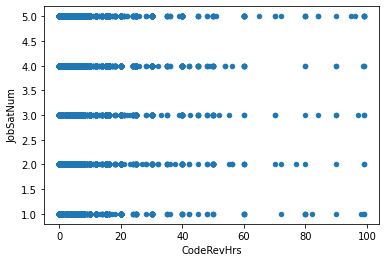

In [8]:
df_hrs.plot.scatter(x='CodeRevHrs', y='JobSatNum')

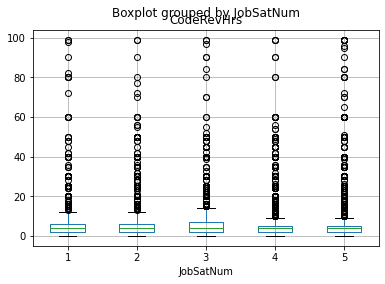

In [9]:
# Given that there are only 168 hours in a week, I'm having difficulty
# believing that developers spend 100 hours a week reviewing code

# This data may be accurate, but I'm going to see how the data looks
# once outliers have been removed

df_hrs.boxplot(by='JobSatNum', column='CodeRevHrs')

In [10]:
mean = df_hrs['CodeRevHrs'].mean()
stdev = df_hrs['CodeRevHrs'].std()

limit = mean + (3 * stdev)

filtered = df_hrs[df_hrs['CodeRevHrs'] <= limit]

filtered_out_count = len(df_hrs) - len(filtered)

print(f'{filtered_out_count} developers filtered out')

583 developers filtered out


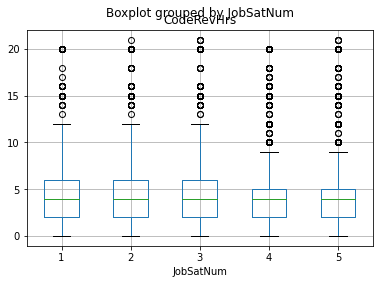

In [11]:
filtered.boxplot(by='JobSatNum', column='CodeRevHrs')

In [12]:
# First impressions of the above box plot are that there is actually a trend
# towards developers being more satisfied at their jobs if they do fewer
# hours reviewing code each week

# Next I'll try to include the developers who don't review code at all

In [13]:
def filler(row):
    if pandas.isna(row['CodeRevHrs']):
        return 0.0 if row['CodeRev'] == 'No' else numpy.NaN
    return row['CodeRevHrs']

filled = df.copy()
filled['CodeRevHrs'] = filled.apply(filler, axis=1)
filled = filled[['CodeRevHrs', 'JobSat']]
filled = filled.dropna()

filled['JobSatNum'] = filled.apply(sat_to_num, axis=1)
filled = filled[['CodeRevHrs', 'JobSatNum']]

filled.head()

,CodeRevHrs,JobSatNum
2,0.0,4
3,0.0,4
5,0.0,4
6,6.0,3
8,12.0,4


In [14]:
filled.corr()

# It looks like by itself, time spent reviewing code is no indication
# of job satisfaction at all

,CodeRevHrs,JobSatNum
CodeRevHrs,1.000000,-0.000326
JobSatNum,-0.000326,1.000000
